# Regularization #

Linear Regression is a very powerful model to make predictions of continuous values, but it come with some limitations.


Let's suppose we build our model, it might looks our prediction are not really accurate, or maybe our model works very well on train data, but performs really bad on our test data. This is usually a case of <strong>Overfitting</strong>
that means that our line fits very well on out train data, but the same line fits badly on other data.


In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients. How does reducing the coefficients will help us?

In [2]:
import matplotlib.pyplot as plt
#this is to tell matplot to plot the graph in the editor
%matplotlib inline
import pandas as pd
import numpy as np

In [46]:
data = pd.read_csv('lr_assets/house_data.csv')

y = data['price'] #this is what we want to predict
data = data.drop('price', axis=1) #and let's remove it from the data we will use for training


## rescale the values in data
# from sklearn import preprocessing

# min_max_scaler = preprocessing.MinMaxScaler()
# cols = data.columns

# np_scaled = min_max_scaler.fit_transform(data)
# data = pd.DataFrame(np_scaled)
# data.columns = cols

In [47]:
def plot(model): #used for plotting coefficients or our model
    coef = pd.Series(model.coef_,data.columns).sort_values()
    coef.plot(kind='bar', title='Modal Coefficients')

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state =0)

score:  0.6963471528724062


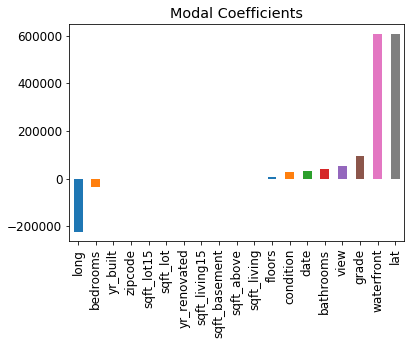

In [49]:
#LINEAR REGRESSION 

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print('score: ' , model.score(X_test, y_test))
plot(model)

score:  0.6685350823580316


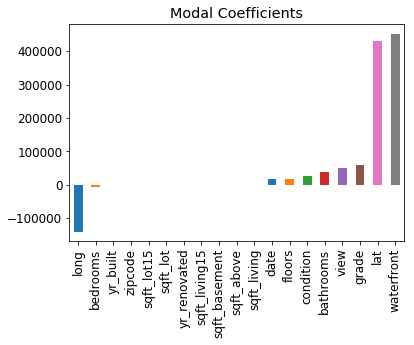

In [51]:
#RIDGE REGRESSION

#it limits the extremes of the weights.

from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.5, normalize=True)

ridgeReg.fit(X_train,y_train)
print('score: ' , ridgeReg.score(X_test, y_test))
plot(ridgeReg)

36107200984.92611
score:  0.6963849246375515


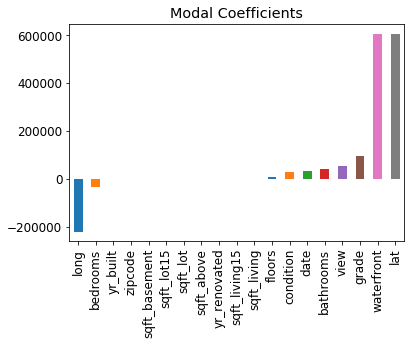

In [54]:
#LASSO REGRESSION

#it works by selecting the features

from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.5, normalize=True)

lassoReg.fit(X_train,y_train)

pred_cv = lassoReg.predict(X_test)



#calculating mse

mse = np.mean((pred_cv - y_test)**2)

print(mse)


print('score: ' , lassoReg.score(X_test, y_test))
plot(lassoReg)